# Классификация типа Транспортных средств

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
print(f'Tensorflow version {tf.__version__}')
print(f'GPU is {"ON" if tf.compat.v1.config.experimental.list_physical_devices("GPU") else "OFF" }')

Tensorflow version 2.10.0
GPU is ON


In [2]:
import numpy as np
import matplotlib, random
import matplotlib.pyplot as plt
import pandas as pd 
import cv2
import os, json
from argparse import ArgumentParser as ArgParse

%matplotlib inline

In [3]:
from imutils import paths
from PIL import Image
from matplotlib import cm

In [4]:
# # Method to obtain json files with class information
# def main(label):
#     output_path = label + '_withclasses.json'
#     out = open(output_path, 'w')
#     with open(label + '.json') as json_file, open(label + '_classes.txt') as txt:
#         for line_json, line_classes in zip(json_file, txt):
#             line_json = line_json.strip()
#             line_classes = line_classes.strip()
#             j_content = json.loads(line_json)
#             j_content['classes'] = line_classes

#             string = json.dumps(j_content)
#             string += '\n'
#             out.write(string)




In [5]:
# main(os.path.join('.', "label_data_0313"))
# main(os.path.join('.', "label_data_0531"))
# main(os.path.join('.', "label_data_0601"))

In [20]:
def save_image(label, ROI_image, number):
    if int(label) == 1:
#         print(label)
        ROI_image.save("./test/continuous_yellow/img_{%s}.jpg" %(number))
    if int(label) == 2:
#         print(label)
        ROI_image.save("./test/continuous/img_{%s}.jpg" %(number))
    if int(label) == 3:
#         print(label)
        ROI_image.save("./test/dashed/img_{%s}.jpg" %(number))
    if int(label) == 4:
#         print(label)
        ROI_image.save("./test/double-dashed/img_{%s}.jpg" %(number))
    if int(label) == 5:
#         print(label)
        ROI_image.save("./test/Botts-dots/img_{%s}.jpg" %(number))
    if int(label) == 6:
#         print(label)
        ROI_image.save("./test/double_continuous/img_{%s}.jpg" %(number))
    if int(label) == 7:
#         print(label)
        ROI_image.save("./test/other/img_{%s}.jpg" %(number))

In [7]:
def get_coord(coord):
    x_max = max(coord, key=lambda x: (x[0]))[0]
    y_min = max(coord, key=lambda x: (-x[1]))[1]
    start_point = [x_max, y_min]

    #x min, y max
    x_min = max(coord, key=lambda x: (-x[0]))[0]
    y_max = max(coord, key=lambda x: (x[1]))[1]
    end_point =  [x_min, y_max]
    return x_max, y_min, x_min, y_max, start_point, end_point

# Visualiser

### CNN

In [8]:
# Color palette for lane visualization
def getcolor(code):
    if code == 1:
        return (0, 255, 0)
    if code == 2:
        return (0, 255, 255)
    if code == 3:
        return (255, 255, 0)
    if code == 4:
        return (255, 0, 0)
    if code == 5:
        return (0, 0, 255)
    if code == 6:
        return (45, 88, 200)
    if code == 7:
        return (213, 22, 224)

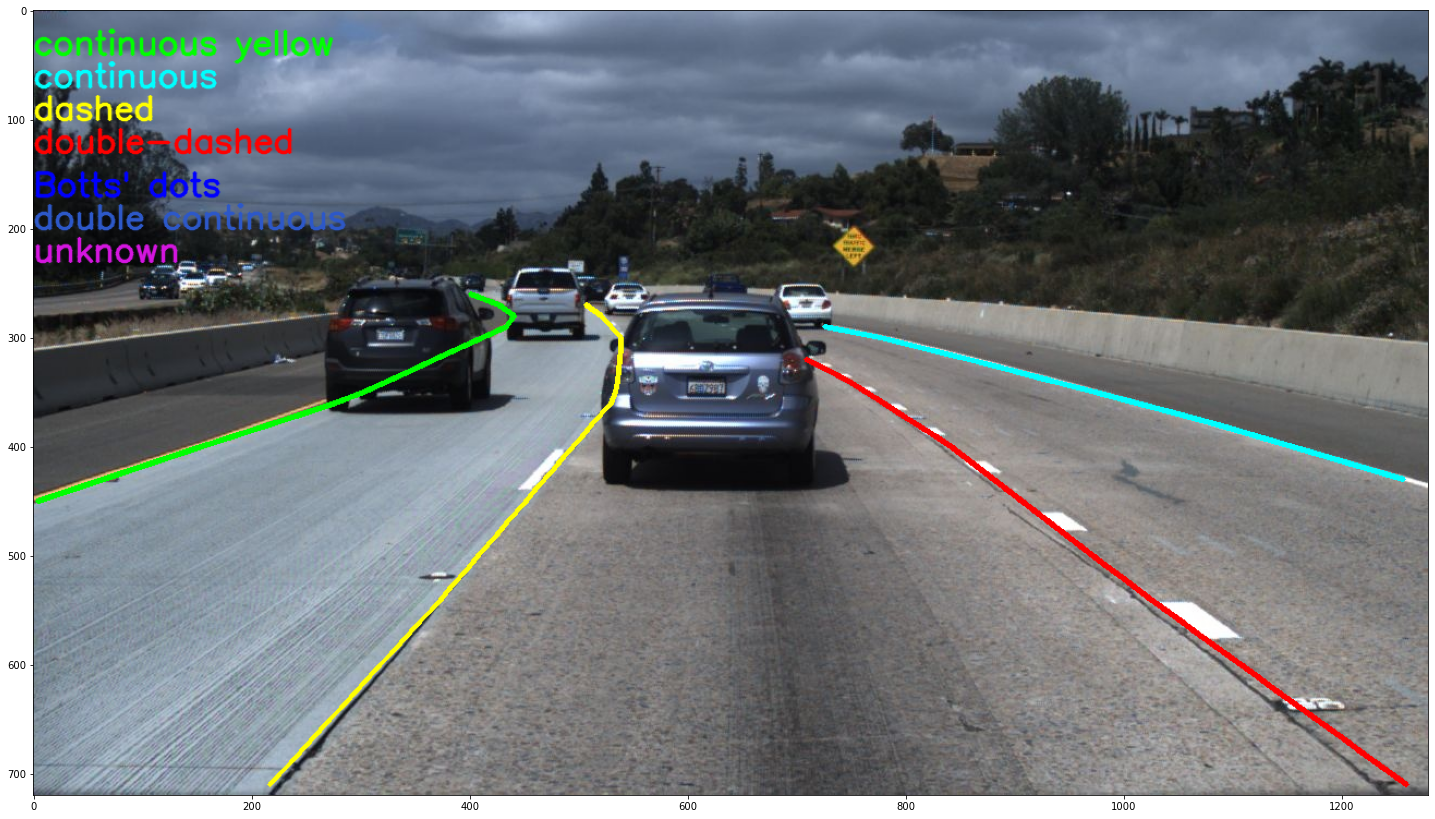

In [9]:
import random
json_data = [json.loads(line) for line in open('label_data_0601_withclasses.json')]
im_ = 87
labels=[]
lanes=[]
for l in range(len(json_data[im_]['lanes'])):
    lane = json_data[im_]['lanes'][l]
    lanes.append(lane)
    imagepath = json_data[im_]['raw_file']
    label = json_data[im_]['classes'].strip().split(' ')[l]
    labels.append(label)
    y_samples = json_data[im_]['h_samples']

image = cv2.imread(imagepath, 1) ## Считываем изображение
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) ## переводим в оттенки серого

gt_lanes_vis = [[(x, y) for (x, y) in zip(l, y_samples) if x >= 0] for l in lanes]

    
lb = 0
for l in gt_lanes_vis:
    cv2.polylines(image, np.int32([l]), isClosed=False, color=getcolor(int(labels[lb])), thickness=3)
    lb=lb+1
    
    
cv2.putText(image,'continuous yellow',(0,40), cv2.FONT_HERSHEY_SIMPLEX, 1,getcolor(1),2,cv2.LINE_AA)
cv2.putText(image,'continuous',(0,70), cv2.FONT_HERSHEY_SIMPLEX, 1,getcolor(2),2,cv2.LINE_AA)
cv2.putText(image,'dashed',(0,100), cv2.FONT_HERSHEY_SIMPLEX, 1,getcolor(3),2,cv2.LINE_AA)
cv2.putText(image,'double-dashed',(0,130), cv2.FONT_HERSHEY_SIMPLEX, 1,getcolor(4),2,cv2.LINE_AA)
cv2.putText(image,'Botts\' dots',(0,170), cv2.FONT_HERSHEY_SIMPLEX, 1,getcolor(5),2,cv2.LINE_AA)
cv2.putText(image,'double continuous',(0,200), cv2.FONT_HERSHEY_SIMPLEX, 1,getcolor(6),2,cv2.LINE_AA)
cv2.putText(image,'unknown',(0,230), cv2.FONT_HERSHEY_SIMPLEX, 1,getcolor(7),2,cv2.LINE_AA)


plt.figure(figsize=(25,25))
plt.imshow(image)
plt.show()

In [39]:
# import random
# json_data = [json.loads(line) for line in open('label_data_0313_withclasses.json')]
# for im_ in range(len(json_data)):
#     print(im_)
#     labels=[]
#     lanes=[]
#     for l in range(len(json_data[im_]['lanes'])):
#         lane = json_data[im_]['lanes'][l]
#         lanes.append(lane)
#         imagepath = json_data[im_]['raw_file']
#         label = json_data[im_]['classes'].strip().split(' ')[l]
#         labels.append(label)
#         y_samples = json_data[im_]['h_samples']

#     image = cv2.imread(imagepath, 1) ## Считываем изображение
#     image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) ## переводим в оттенки серого

#     gt_lanes_vis = [[(x, y) for (x, y) in zip(l, y_samples) if x >= 0] for l in lanes]
# #     print(len(gt_lanes_vis))
#     try:
#         for i in range(len(gt_lanes_vis)):
#             x_clone = image.copy()
#             x_max, y_min, x_min, y_max, start_point, end_point = get_coord(gt_lanes_vis[i])
#     #         ROI_image = cv2.rectangle(x_clone, start_point, end_point, (255, 0, 0), 3)
#             ROI_image = Image.fromarray(x_clone)
#             ROI_image = ROI_image.crop((x_min,y_min,x_max,y_max))
#             save_image(labels[i], ROI_image, random.randint(0,10000000000000000))
#     except:
#         pass
    
# #     lb = 0
# #     for l in gt_lanes_vis:
# #         cv2.polylines(image, np.int32([l]), isClosed=False, color=getcolor(int(labels[lb])), thickness=3)
# #         lb=lb+1
    
    
# # cv2.putText(image,'continuous yellow',(0,40), cv2.FONT_HERSHEY_SIMPLEX, 1,getcolor(1),2,cv2.LINE_AA)
# # cv2.putText(image,'continuous',(0,70), cv2.FONT_HERSHEY_SIMPLEX, 1,getcolor(2),2,cv2.LINE_AA)
# # cv2.putText(image,'dashed',(0,100), cv2.FONT_HERSHEY_SIMPLEX, 1,getcolor(3),2,cv2.LINE_AA)
# # cv2.putText(image,'double-dashed',(0,130), cv2.FONT_HERSHEY_SIMPLEX, 1,getcolor(4),2,cv2.LINE_AA)
# # cv2.putText(image,'Botts\' dots',(0,170), cv2.FONT_HERSHEY_SIMPLEX, 1,getcolor(5),2,cv2.LINE_AA)
# # cv2.putText(image,'double continuous',(0,200), cv2.FONT_HERSHEY_SIMPLEX, 1,getcolor(6),2,cv2.LINE_AA)
# # cv2.putText(image,'unknown',(0,230), cv2.FONT_HERSHEY_SIMPLEX, 1,getcolor(7),2,cv2.LINE_AA)


# plt.figure(figsize=(25,25))
# plt.imshow(image)
# plt.show()

In [55]:
data = []
labels = []
sumu =0
end = 1500
input_size = (256,256)
path = "./data/"
num_classes = len(os.listdir(path))
for file_number in os.listdir(path):
    path2 = str(path+file_number)
    num = 0
    count=0
    for file_number_2 in os.listdir(path2):
        path3 = str(path2 + '/' + file_number_2)
        # if file_number == 'wet_asphalt':
        #     if count == 2000: break
        # else: 
        if count == end: break
        count = count+1
        imagepath = (path3)
        image = cv2.imread(imagepath, 1) 
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, input_size)
        data.append(image)

        label = file_number
        labels.append(label)
    num = num + count
    sumu = sumu+count
    print(label, num)
print('all',sumu)

Botts-dots 1500
continuous 1500
continuous_yellow 1239
dashed 1500
double_continuous 524
double_dashed 397
all 6660


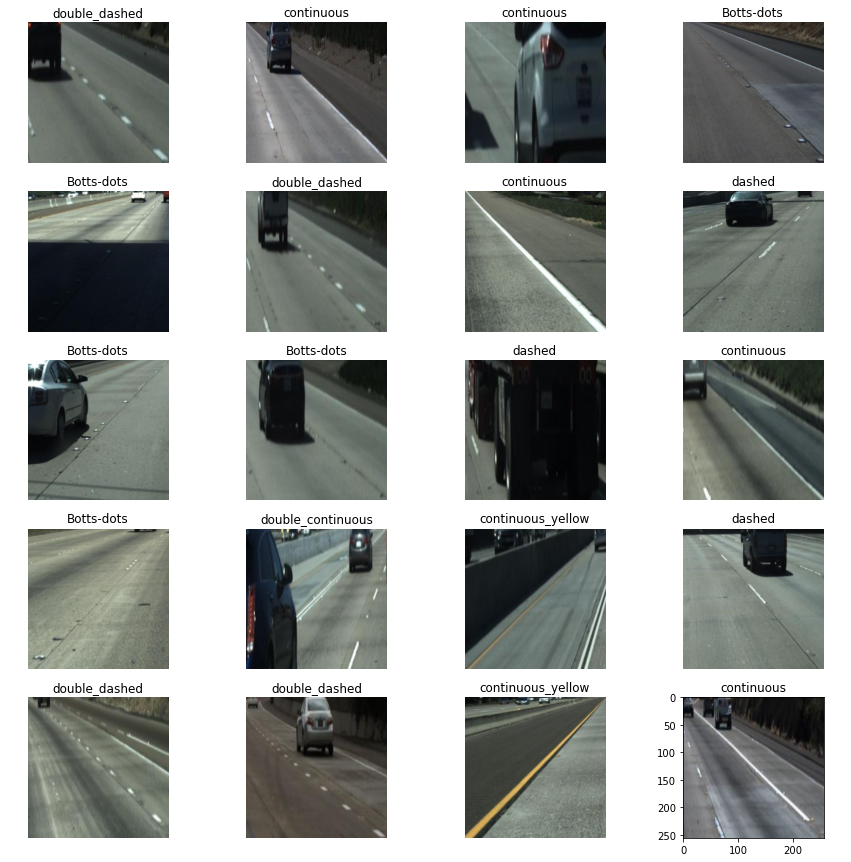

In [57]:
fig = plt.figure(figsize=(15, 15))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    z = random.randint(1,len(labels))
    plt.axis('off') 
    fig.add_subplot(rows, columns, i)
    plt.title(labels[z])
    plt.imshow(data[z])
plt.show()

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state = 42, test_size = 0.2, stratify = labels)#stratify = labels


from keras.utils import to_categorical
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [59]:
from keras.models import Sequential, load_model
import tensorflow_addons as tfa
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D, Conv2DTranspose
from keras.optimizers import Adam as adam
from keras.optimizers import SGD
from keras.metrics import RootMeanSquaredError
from keras import initializers
import math

initializer = initializers.RandomUniform(-1.0 / math.sqrt(512), 1.0 / math.sqrt(512), seed=42)

#Building the model
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=5, activation='swish', input_shape=np.array(X_train).shape[1:]))
model.add(Conv2D(filters=32, kernel_size=5, activation='swish'))

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization (momentum=0.9, epsilon=1e-5))
model.add(Dropout(rate=0.05))

model.add(Conv2D(filters=64, kernel_size=5, activation='swish'))
model.add(Conv2D(filters=64, kernel_size=5, activation='swish'))

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization (momentum=0.9, epsilon=1e-5))
model.add(Dropout(rate=0.1))

model.add(Conv2D(filters=128, kernel_size=3, activation='swish'))
model.add(Conv2D(filters=128, kernel_size=3, activation='swish'))

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization (momentum=0.9, epsilon=1e-5))
model.add(Dropout(rate=0.15))

model.add(Conv2D(filters=256, kernel_size=3, activation='swish'))
model.add(Conv2D(filters=256, kernel_size=3, activation='swish'))

model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization (momentum=0.9, epsilon=1e-5))
model.add(Dropout(rate=0.15))

model.add(Conv2D(filters=512, kernel_size=1,activation='swish'))

model.add(GlobalAveragePooling2D()) 
model.add(Dense(1024, activation='swish'))
model.add(Dense(num_classes,kernel_initializer=initializer, bias_initializer=initializer, activation='softmax')) 

model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 252, 252, 32)      2432      
                                                                 
 conv2d_19 (Conv2D)          (None, 248, 248, 32)      25632     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 124, 124, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 124, 124, 32)     128       
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 124, 124, 32)      0         
                                                                 
 conv2d_20 (Conv2D)          (None, 120, 120, 64)     

In [60]:
class StopOnPoint(tf.keras.callbacks.Callback):
    def __init__(self, point):
        super(StopOnPoint, self).__init__()
        self.point = point

    def on_epoch_end(self, epoch, logs=None): 
        accuracy = logs["val_f1_score"]
        accuracy = sum(accuracy) / len(accuracy)
        if accuracy >= self.point:
            self.model.stop_training = True


In [61]:
history = model.fit(np.array(X_train), np.array(y_train), batch_size=5, epochs=20,validation_data=(np.array(X_test), np.array(y_test)))

Epoch 1/20
1066/1066 [==============================] - 120s 111ms/step - loss: 1.0135 - accuracy: 0.6134 - val_loss: 0.6843 - val_accuracy: 0.7823
Epoch 2/20
1066/1066 [==============================] - 118s 111ms/step - loss: 0.5480 - accuracy: 0.8067 - val_loss: 0.3678 - val_accuracy: 0.8754
Epoch 3/20
1066/1066 [==============================] - 120s 113ms/step - loss: 0.3828 - accuracy: 0.8729 - val_loss: 0.3187 - val_accuracy: 0.8851
Epoch 4/20
1066/1066 [==============================] - 119s 111ms/step - loss: 0.3187 - accuracy: 0.8955 - val_loss: 0.2917 - val_accuracy: 0.9062
Epoch 5/20
1066/1066 [==============================] - 118s 111ms/step - loss: 0.2751 - accuracy: 0.9135 - val_loss: 0.3013 - val_accuracy: 0.9369
Epoch 6/20
1066/1066 [==============================] - 119s 112ms/step - loss: 0.2987 - accuracy: 0.9043 - val_loss: 0.3324 - val_accuracy: 0.8866
Epoch 7/20
1066/1066 [==============================] - 119s 112ms/step - loss: 0.2422 - accuracy: 0.9208 - val_

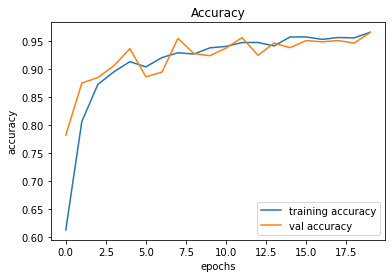

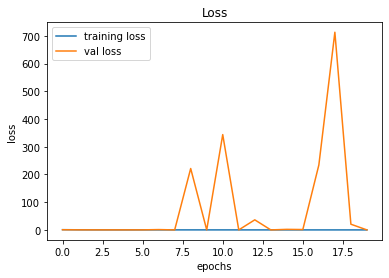

In [62]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [74]:
model.save('./saved_models/Road_Line_CNN.h5')

./test/test.0.jpg
1/1 [==============================] - 0s 203ms/step
./test/test.1.jpg
1/1 [==============================] - 0s 21ms/step
./test/test.2.jpg
1/1 [==============================] - 0s 21ms/step
./test/test.3.jpg
1/1 [==============================] - 0s 23ms/step
./test/test.4.jpg
1/1 [==============================] - 0s 20ms/step


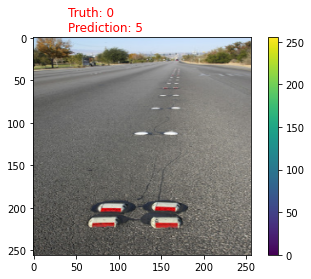

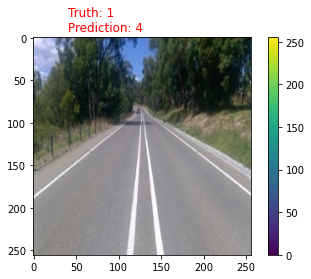

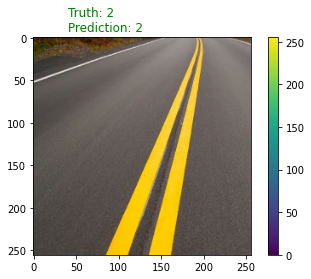

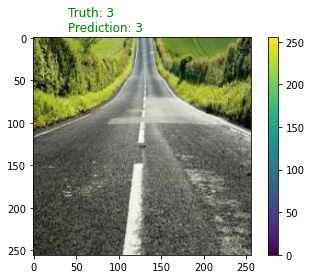

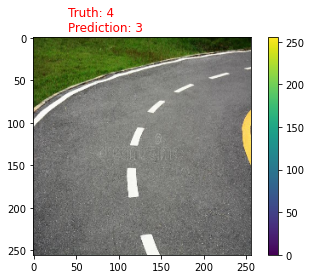

In [64]:
dt = []
path = "./test/"
for i in os.listdir(path):
    imagePath = path+str(i)
    print(imagePath)
    image = cv2.imread(imagePath) ## Считываем изображение
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) ## переводим в оттенки серого
    image = cv2.resize(image, input_size) #изменяем размер на 30х30 пикселей
    image = np.array(image)
    img_batch = np.expand_dims(image, 0) 
    dt.append(image)

    test_pred = model.predict(img_batch)
    prediction = np.argmax(test_pred, axis=1)
    truth = str(i).split('.')[1]

    if prediction[0] == int(truth): 
        color='green' 
    else: 
        color='red'

    plt.figure()
    plt.text(40, 10, "Truth: {0}\nPrediction: {1}\n".format(truth, prediction[0]), fontsize=12, color = color)
    plt.imshow(image)
    plt.colorbar()
    plt.grid(False)


In [71]:
all_classes = []
pred_classes = []
path = "./test2/"
for i in os.listdir(path):
    count = 0
    for z in os.listdir(path+str(i)):
#         if count == 300:break
        count = count+1
        imagePath = path+str(i)+'/'+str(z)
        image = cv2.imread(imagePath) ## Считываем изображение
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) ## переводим в оттенки серого
        image = cv2.resize(image, input_size) #изменяем размер на 30х30 пикселей
        image = np.array(image)
        img_batch = np.expand_dims(image, 0) 
        dt.append(image)

        test_pred = model.predict(img_batch)
        prediction = np.argmax(test_pred, axis=1)
        truth = int(i)
        all_classes.append(truth)
        pred_classes.append(prediction[0])
        if prediction[0] != truth:
            print(imagePath)


1/1 [==============================] - 0s 9ms/step
./test2/0/img_{1193010903929414}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{1383978680797521}.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step
./test2/0/img_{1921101840629018}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{1983032486386950}.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step
./test2/0/img_{2377979014986939}.jpg
1/1 [==============================] - 0s 25ms/step
./test2/0/img_{2611807553931583}.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step
./test2/0/img_{2953877525119341}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{2966431895258400}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/0/img_{309183748278795}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{309837111822680}.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step
./test2/0/img_{3209345133943986}.jpg
1/1 [==============================] - 0s 30ms/step
./test2/0/img_{3356139712499248}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/0/img_{3406237183963645}.jpg
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step
./test2/0/img_{3667562673383661}.jpg
1/1 [==============================] - 0s 28ms/step
./test2/0/img_{3805752217676433}.jpg
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step
./test2/0/img_{3884193995001019}.jpg
1/1 [==============================] - 0s 18ms/step
./test2/0/img_{3958759204039318}.jpg
1/1 [==============================] - 0s 18ms/step
./test2/0/img_{3997743289140280}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/0/img_{4030571999061221}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/0/img_{4069208671272474}.jpg
1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 20ms/step
./test2/0/img_{4401887431338415}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/0/img_{4422693496504123}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{4444254896893542}.jpg
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 18ms/step
./test2/0/img_{4501749658591363}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{4507763500711214}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{4813214331778875}.jpg


1/1 [==============================] - 0s 22ms/step
./test2/0/img_{4911180222493165}.jpg
1/1 [==============================] - 0s 17ms/step
./test2/0/img_{4934763985903396}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/0/img_{4957689904702866}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/0/img_{4973741992341790}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/0/img_{5109165261558161}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/0/img_{5121022173511419}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/0/img_{5137282003754014}.jpg
1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 23ms/step
./test2/0/img_{5222257414476931}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/0/img_{5243912975393453}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{536020912625536}.jpg
1/1 [==============================] - 0s 25ms/step
./test2/0/img_{5405646043388734}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{5449039154174743}.jpg
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step
./test2/0/img_{5491851919723410}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/0/img_{5534046682124880}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/0/img_{5543021213210507}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/0/img_{5681007349854571}.jpg
1/1 [==============================] - 0s 24ms/step
./test2/0/img_{5711861981153238}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{5820853333723933}.jpg
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step
./test2/0/img_{5870259426579095}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/0/img_{598676024000044}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/0/img_{6056959008155927}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/0/img_{6089213114193797}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/0/img_{6090109066929411}.jpg
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step
./test2/0/img_{6163338654542216}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{6265997101077961}.jpg
1/1 [==============================] - 0s 18ms/step
./test2/0/img_{6306847014179771}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/0/img_{6324021033005157}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/0/img_{6378527603660663}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/0/img_{6389026902675247}.jpg
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step
./test2/0/img_{6458154939126739}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/0/img_{6499940134381054}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{6521658352358372}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/0/img_{6633841395733795}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/0/img_{6648239841049301}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{6673101459921950}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{670136291340297}.jpg
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step
./test2/0/img_{6848218605215376}.jpg
1/1 [==============================] - 0s 25ms/step
./test2/0/img_{6890427463641193}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{7007870725201289}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{7042313936519152}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{7050867996608838}.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step
./test2/0/img_{7182861672242500}.jpg
1/1 [==============================] - 0s 18ms/step
./test2/0/img_{7198586964721279}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/0/img_{7225676372497689}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/0/img_{7252756381882311}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/0/img_{7332518212605773}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/0/img_{7360635982068415}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/0/img_{7370420911760528}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{7387131600807539}.jpg
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step
./test2/0/img_{7495505349162994}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{7518869357156296}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/0/img_{7530557556601726}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{7580470666886179}.jpg
1/1 [==============================] - 0s 18ms/step
./test2/0/img_{7585762074300155}.jpg
1/1 [==============================] - 0s 29ms/step
./test2/0/img_{7702269913202909}.jpg
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step
./test2/0/img_{7765063856221339}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/0/img_{7848097963498859}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/0/img_{7911325047672186}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/0/img_{792147822667256}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/0/img_{7943463236638074}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{7945883530793365}.jpg
1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 26ms/step
./test2/0/img_{8040165811952350}.jpg
1/1 [==============================] - 0s 26ms/step
./test2/0/img_{8117978763792289}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{8133234362174494}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/0/img_{8151838652463793}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/0/img_{8200738419115167}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/0/img_{8219550680353094}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/0/img_{8264566454799882}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/0/img_{8275641548665554}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/0/img_{8277458152713088}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/0/img_{8302123235241110}.jpg
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step
./test2/0/img_{8372369179534938}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/0/img_{8397074017904552}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/0/img_{8408727648711378}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{8420776444366420}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/0/img_{8442192016645664}.jpg
1/1 [==============================] - 0s 24ms/step
./test2/0/img_{8472677389643759}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{8586516979167765}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{8608669637711036}.jpg
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step
./test2/0/img_{8847526697187554}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/0/img_{8884550816861471}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/0/img_{8909979140845717}.jpg
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step
./test2/0/img_{9026000633786824}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{9115694986544937}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/0/img_{9153794557264165}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/0/img_{9178250386937727}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{9211555526596323}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{9237465508615638}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/0/img_{9256738251657490}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{9267821725270443}.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 18ms/step
./test2/0/img_{9309911474691824}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/0/img_{9436744841766199}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/0/img_{9510335127291666}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/0/img_{9590438468992562}.jpg
1/1 [==============================] - 0s 18ms/step
./test2/0/img_{9604259851725262}.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step
./test2/0/img_{9675651737747399}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{9724386588124501}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/0/img_{9756987514321958}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{9765340917047270}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/0/img_{9832223269606410}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/0/img_{9911018303305579}.jpg
1/1 [==============================] - 0s 18ms/step
./test2/0/img_{9914336903492865}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/0/img_{9942718116428066}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/0/img_{9949665231470678}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/0/img_{9988421171669331}.jpg
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 25ms/step
./test2/1/img_{1152796386057754}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/1/img_{1226238856178931}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/1/img_{1235463230929598}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/1/img_{1282726946690545}.jpg
1/1 [==============================] - 0s 18ms/step
./test2/1/img_{1416740426948888}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/1/img_{1697319353107701}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/1/img_{1830080310499763}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/1/img_{1835488215180727}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/1/img_{1907275751293110}.jpg
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 16ms/step
./test2/1/img_{2182803693048692}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/1/img_{2204067940939034}.jpg
1/1 [==============================] - 0s 18ms/step
./test2/1/img_{2987565062442371}.jpg
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 19ms/step
./test2/1/img_{3233684827094037}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/1/img_{3654833263837009}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/1/img_{3865966961733007}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/1/img_{3991479087062071}.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step
./test2/1/img_{4393632550150233}.jpg
1/1 [==============================] - 0s 29ms/step
./test2/1/img_{4504575532680837}.jpg
1/1 [==============================] - 0s 18ms/step
./test2/1/img_{460578580800971}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/1/img_{4741137053610590}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/1/img_{4742749310844244}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/1/img_{4919573060280034}.jpg
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step
./test2/1/img_{5362565808508438}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/1/img_{5723563091256479}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/1/img_{5728163424149207}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/1/img_{5902010093029365}.jpg
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step
./test2/1/img_{6447170070217673}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/1/img_{6502390825735914}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/1/img_{6598137803740736}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/1/img_{6973313232497981}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/1/img_{699214472145235}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/1/img_{7079114525464695}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/1/img_{7083751230829683}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/1/img_{7169996382327482}.jpg
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step
./test2/1/img_{7448942535483980}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/1/img_{7729236628402852}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/1/img_{7794717041218388}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/1/img_{7871488413460891}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/1/img_{7913788421667386}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/1/img_{8031735524782483}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/1/img_{8126037046556960}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/1/img_{8300798068638089}.jpg
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 21ms/step
./test2/1/img_{8553743659918807}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/1/img_{8560058397907539}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/1/img_{8642954818819784}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/1/img_{8698556406163524}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/1/img_{9066888833582405}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/1/img_{9469904501640214}.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step
./test2/1/img_{9712529804495559}.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 22ms/step
./test2/2/img_{2263174425207066}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/2/img_{2271506891534688}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/2/img_{2298419047696323}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/2/img_{2438527492014275}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/2/img_{2778404806068867}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/2/img_{3203289099859204}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/2/img_{3327475868163027}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/2/img_{341522752629178}.jpg
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step
./test2/2/img_{3842054910051890}.jpg
1/1 [==============================] - 0s 24ms/step
./test2/2/img_{3881017817056375}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/2/img_{4107595833837326}.jpg
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 26ms/step
./test2/2/img_{5531619351760297}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/2/img_{5689919878771654}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/2/img_{5828116282206808}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/2/img_{5959037868201269}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/2/img_{6081857188686641}.jpg
1/1 [==============================] - 0s 24ms/step
./test2/2/img_{6127547541831264}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/2/img_{616423906832557}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/2/img_{6662673055202407}.jpg
1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step
./test2/2/img_{7546382040829360}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/2/img_{7611988704525686}.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step
./test2/2/img_{913685949786712}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/2/img_{9690611452696784}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/2/img_{9699259492551951}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{1037686219311723}.jpg
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step
./test2/3/img_{1244264300080147}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{125240172886170}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{129263260863393}.jpg
1/1 [==============================] - 0s 24ms/step
./test2/3/img_{1322276640727304}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{1425243780868630}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{1425742546319844}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{1514423538339655}.jpg
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step
./test2/3/img_{1640518657497802}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/3/img_{1742738322599866}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{1754204026130073}.jpg
1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step
./test2/3/img_{2049424695182142}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{2063613856181020}.jpg
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 24ms/step
./test2/3/img_{2388624210466080}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{2439243992174042}.jpg
1/1 [==============================] - 0s 26ms/step
./test2/3/img_{2465674782237081}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{2553790598525032}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{2793757402754423}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{2807937602144224}.jpg
1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 19ms/step
./test2/3/img_{2833031710340486}.jpg
1/1 [==============================] - 0s 25ms/step
./test2/3/img_{2962476210296435}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{3066664318950467}.jpg
1/1 [==============================] - 0s 25ms/step
./test2/3/img_{3067222886965296}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{3111312633736113}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{3143698563467729}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{3186547772954297}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{3201280619948642}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{3219278657624664}.jpg
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 22ms/step
./test2/3/img_{3288699950658404}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/3/img_{3309465888478455}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/3/img_{3440753524560949}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{3502679779131672}.jpg
1/1 [==============================] - 0s 24ms/step
./test2/3/img_{3583325519574052}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{3646401224117551}.jpg
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step
./test2/3/img_{3658993285091273}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{3722046833515407}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/3/img_{3803790698081030}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{3852245284463917}.jpg
1/1 [==============================] - 0s 11ms/step
./test2/3/img_{3913551136520392}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{4050741627908908}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{4075239996140455}.jpg
1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step
./test2/3/img_{4150221031370280}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{41855999353111}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{4197905573071887}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{4275291708233198}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{432163075113331}.jpg
1/1 [==============================] - 0s 31ms/step
./test2/3/img_{4362951827424194}.jpg
1/1 [==============================] - 0s 32ms/step
./test2/3/img_{4454039940320434}.jpg
1/1 [==============================] - 0s 30ms/step
./test2/3/img_{4486599636500105}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{4550474627846547}.jpg
1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 21ms/step
./test2/3/img_{4705275371821949}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{4803116788708224}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{4821861904841573}.jpg
1/1 [==============================] - 0s 24ms/step
./test2/3/img_{4840912229194563}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{486603912882902}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{4949577795177180}.jpg
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 20ms/step
./test2/3/img_{5081508767537252}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{5204847315955849}.jpg
1/1 [==============================] - 0s 24ms/step
./test2/3/img_{523874992670576}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{5269436170424641}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{5297038310036387}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{5334448680360284}.jpg
1/1 [==============================] - 0s 27ms/step
./test2/3/img_{5382335149981066}.jpg
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step
./test2/3/img_{548642956775863}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{556072083019016}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{5594474306399363}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{5654529707540859}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/3/img_{5683433394906399}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{5778403272577741}.jpg
1/1 [==============================] - 0s 25ms/step
./test2/3/img_{5795307918869799}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/3/img_{5798972652366889}.jpg
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 24ms/step
./test2/3/img_{5880595687109100}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/3/img_{5906780510839980}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{5920071787792361}.jpg
1/1 [==============================] - 0s 24ms/step
./test2/3/img_{5935616904870128}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{6046465419725064}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/3/img_{6065194935014581}.jpg
1/1 [==============================] - 0s 30ms/step
./test2/3/img_{6089932475570282}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{613436326761547}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/3/img_{618672896943119}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/3/img_{6256715901730565}.jpg


1/1 [==============================] - 0s 20ms/step
./test2/3/img_{634779261867962}.jpg
1/1 [==============================] - 0s 24ms/step
./test2/3/img_{6411388866432990}.jpg
1/1 [==============================] - 0s 26ms/step
./test2/3/img_{6439445485437537}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{6459936275863428}.jpg
1/1 [==============================] - 0s 35ms/step
./test2/3/img_{6474959071147184}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{6562080953644508}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/3/img_{6588800302340865}.jpg
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 39ms/step
./test2/3/img_{6713435784899500}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{675229319745956}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/3/img_{6847308552275050}.jpg
1/1 [==============================] - 0s 26ms/step
./test2/3/img_{6890807788181243}.jpg
1/1 [==============================] - 0s 24ms/step
./test2/3/img_{6939601607315612}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{6947494311314008}.jpg
1/1 [==============================] - 0s 26ms/step
./test2/3/img_{6979374479630228}.jpg
1/1 [==============================] - 0s 27ms/step
./test2/3/img_{697965447691067}.jpg
1/1 [==============================] - 0s 24ms/step
./test2/3/img_{6987861472237715}.jpg
1/1 [==============================] - 0s 28ms/step
./test2/3/img_{70235392410256}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{7025844949138508}.jpg
1/1 [====================

1/1 [==============================] - 0s 28ms/step
./test2/3/img_{7050780916446342}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{7087814908506491}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{7151711551072924}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{7243305960830496}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{7322214846192178}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{7370528412496482}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{7404522135109480}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{7438844536431402}.jpg


1/1 [==============================] - 0s 23ms/step
./test2/3/img_{7472860178488238}.jpg
1/1 [==============================] - 0s 24ms/step
./test2/3/img_{7477952765523640}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{7495907815284508}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/3/img_{7527554997782033}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{7601500668260921}.jpg
1/1 [==============================] - 0s 25ms/step
./test2/3/img_{7651577928409250}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{7670665460571421}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{7692486939239653}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{7712989325812489}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{7729891303771755}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{779817829799574}.jpg
1/1 [=================

1/1 [==============================] - 0s 22ms/step
./test2/3/img_{7827485635838695}.jpg
1/1 [==============================] - 0s 24ms/step
./test2/3/img_{7857820820508334}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{7886184630772245}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/3/img_{7928312582512915}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{7939587952883818}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{7980042820764483}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{7992078430983050}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{7999333114737664}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{8052156128857480}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/3/img_{8095695729117716}.jpg
1/1 [==============================] - 0s 24ms/step
./test2/3/img_{8115846073847190}.jpg
1/1 [================

1/1 [==============================] - 0s 21ms/step
./test2/3/img_{8215911149159365}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{8235379970270674}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{8242668917524793}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{8370602842919005}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{8384590052986746}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{8407679971907924}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{8527994778215112}.jpg
1/1 [==============================] - 0s 27ms/step
./test2/3/img_{853476325609323}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{8569631499467098}.jpg
1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 22ms/step
./test2/3/img_{8605739696605304}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{8666939792888408}.jpg
1/1 [==============================] - 0s 24ms/step
./test2/3/img_{8762805533313063}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{8804094918956362}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/3/img_{8838054337366363}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{8840350011954147}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{8844602995330890}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{8856547858409191}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/3/img_{8924384033591273}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{8966676808370940}.jpg
1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 19ms/step
./test2/3/img_{9000059719066622}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/3/img_{902854239136034}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{9084517282379657}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{9194087177608776}.jpg
1/1 [==============================] - 0s 17ms/step
./test2/3/img_{9302906223855249}.jpg
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step
./test2/3/img_{9357041635122401}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{9386483021945619}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/3/img_{9400209997634990}.jpg
1/1 [==============================] - 0s 24ms/step
./test2/3/img_{9436460118921200}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{9440129979401874}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{9491324037574519}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/3/img_{9507802361201664}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/3/img_{9549704351102829}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/3/img_{9625539859330902}.jpg
1/1 [==============================] - 0s 24ms/step
./test2/3/img_{9726314334834962}.jpg
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step
./test2/3/img_{9833790072045179}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/4/img_{1369885006458250}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/4/img_{1385782345779285}.jpg
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step
./test2/4/img_{1995277217755803}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/4/img_{2017370670665695}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/4/img_{2270151768543022}.jpg
1/1 [==============================] - 0s 25ms/step
./test2/4/img_{2701225798559857}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/4/img_{2821310382320692}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/4/img_{3247506947314283}.jpg
1/1 [==============================] - 0s 24ms/step
./test2/4/img_{3844518239965898}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/4/img_{4298285681964766}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/4/img_{4301132283367342}.jpg
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 32ms/step
./test2/4/img_{5333258131325846}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/4/img_{5425229262805371}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/4/img_{5721420175041086}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/4/img_{6029863906531725}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/4/img_{6052696988487288}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/4/img_{6410244257686398}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/4/img_{6648088705955098}.jpg
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 20ms/step
./test2/4/img_{805123867280111}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/4/img_{8185470484988928}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/4/img_{9202760896597297}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/4/img_{9461946517690531}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/4/img_{9464406140197683}.jpg
1/1 [==============================] - 0s 26ms/step
./test2/4/img_{966878731397445}.jpg
1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step
./test2/5/img_{1295534508628592}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/5/img_{1707115050953037}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/5/img_{2316907636028621}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/5/img_{2352283554873651}.jpg
1/1 [==============================] - 0s 13ms/step
./test2/5/img_{3137007323826206}.jpg
1/1 [==============================] - 0s 25ms/step
./test2/5/img_{354761898154999}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/5/img_{3582865019643673}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/5/img_{3790714382286073}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/5/img_{4015875738734894}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/5/img_{4076256460545510}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/5/img_{4227202578459320}.jpg
1/1 [=================

1/1 [==============================] - 0s 25ms/step
./test2/5/img_{4823323106849985}.jpg
1/1 [==============================] - 0s 24ms/step
./test2/5/img_{5220427246545011}.jpg
1/1 [==============================] - 0s 25ms/step
./test2/5/img_{5398359629590572}.jpg
1/1 [==============================] - 0s 22ms/step
./test2/5/img_{5931874502633385}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/5/img_{6012595036615255}.jpg
1/1 [==============================] - 0s 20ms/step
./test2/5/img_{6112423221597960}.jpg
1/1 [==============================] - 0s 32ms/step
./test2/5/img_{6427634864715714}.jpg
1/1 [==============================] - 0s 19ms/step
./test2/5/img_{6734026870445276}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/5/img_{7052053265005541}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/5/img_{7520206627928854}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/5/img_{7796946743199069}.jpg
1/1 [================

1/1 [==============================] - 0s 21ms/step
./test2/5/img_{901439251192451}.jpg
1/1 [==============================] - 0s 23ms/step
./test2/5/img_{9393711165446912}.jpg
1/1 [==============================] - 0s 24ms/step
./test2/5/img_{9736170927083000}.jpg
1/1 [==============================] - 0s 21ms/step
./test2/5/img_{9996587510775370}.jpg


In [72]:
from sklearn.metrics import f1_score
print (f1_score(all_classes, pred_classes, average='weighted'))

0.9586510561942376


Text(0.5, 0.98, 'Plot of confusion matrix')

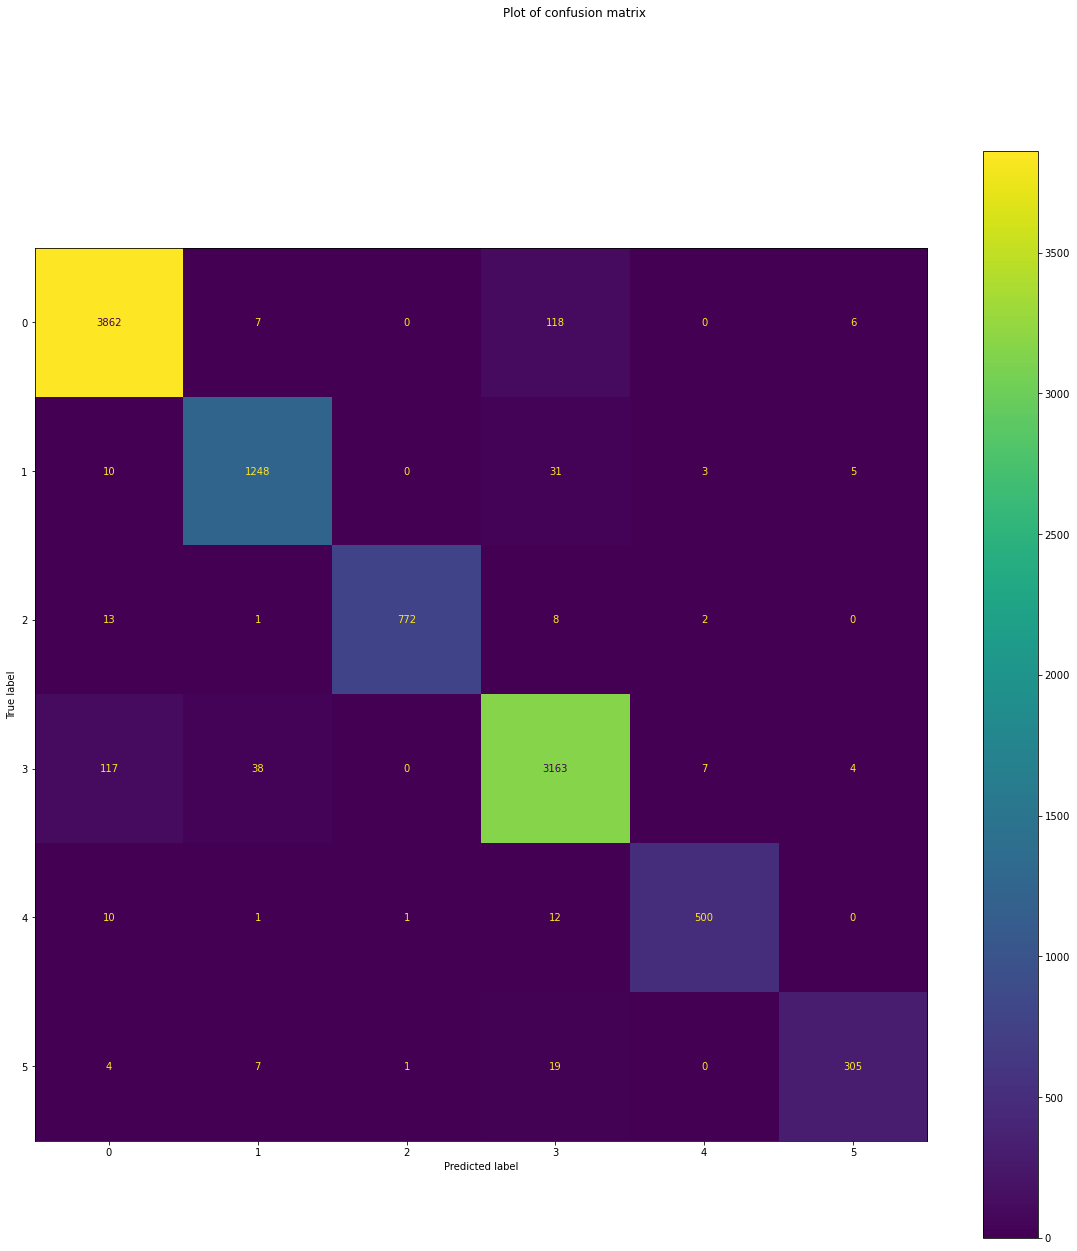

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
display = ConfusionMatrixDisplay.from_predictions(all_classes, pred_classes)
fig = display.figure_
fig.set_figwidth(20)
fig.set_figheight(20) 
fig.suptitle('Plot of confusion matrix')